<a href="https://colab.research.google.com/github/slaterc3/MachLearning2023/blob/main/Copy_of_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')
# X = df.iloc[:, :-1]
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [15]:
#reshape y into a 2D array first
# y = y.reshape(10,1)
y.shape


(10, 1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [20]:
print(X,'\nend of X\nstart of y:\n', y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 
end of X
start of y:
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

RBF = Radial Basis Function

In [21]:

from sklearn.svm import SVR
regress = SVR(kernel='rbf')
regress.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [22]:
sc_y.inverse_transform(regress.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

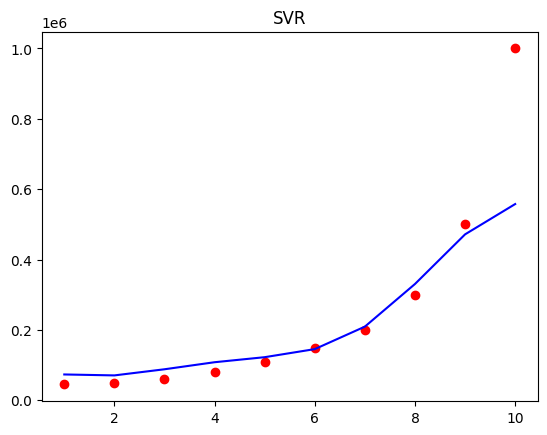

In [23]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regress.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.show()

# X_grid = np.arange(min(X), max(X), 0.1)
# X_grid = X_grid.reshape((len(X_grid),1))
# plt.scatter(X, y, color='red')
# plt.plot(X_grid, sc_y.inverse_transform(sc_X.transform()))

## Visualising the SVR results (for higher resolution and smoother curve)

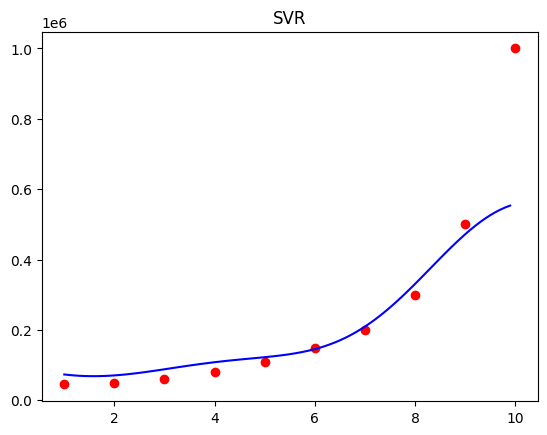

In [25]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regress.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.show()